In [4]:
import tweepy

In [5]:
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

# UNHCR - The UN Refugee Agency Twitter Sentiment Analysis

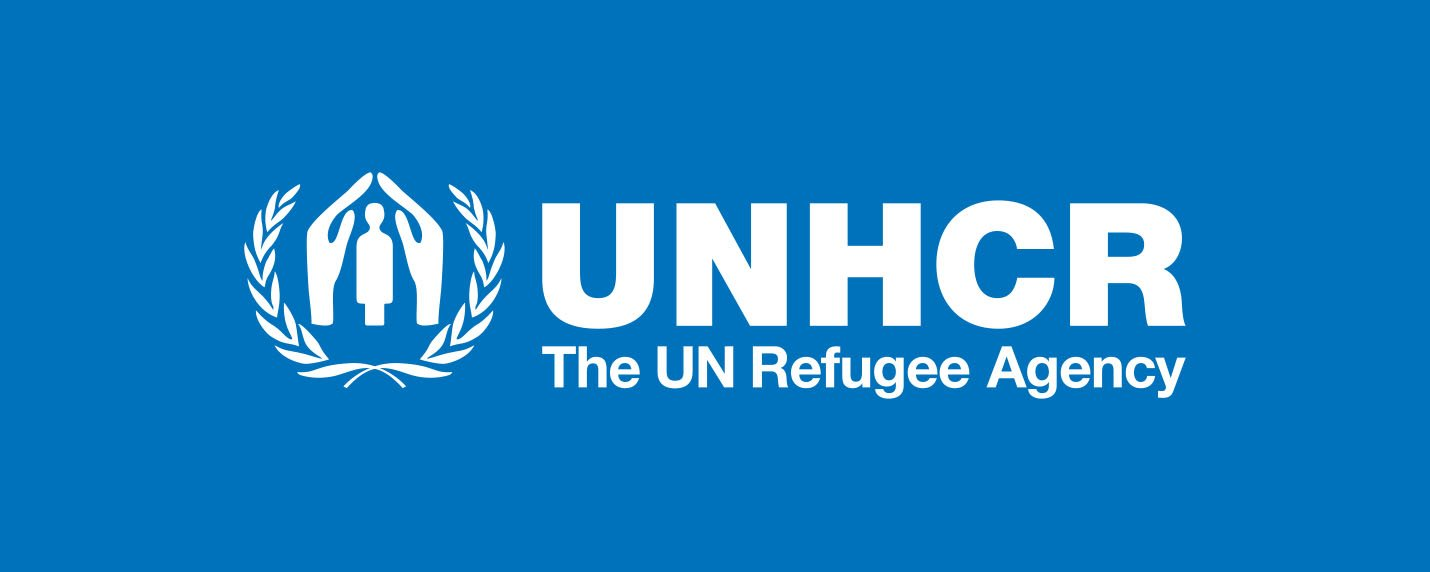

In [3]:
from IPython.display import Image
Image(filename='unhcr.jpg')

In [6]:
import nltk
from nltk.corpus import stopwords

In [ ]:
# Twitter Credentials

consumer_key = ##########
consumer_secret = ########

access_token = #########
access_token_secret = #############

In [8]:
authenticate = tweepy.OAuthHandler(consumer_key, consumer_secret) 

In [9]:
authenticate.set_access_token(access_token, access_token_secret) 

In [10]:
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [11]:
screen_name1 = 'Refugees'

In [12]:
alltweets = []  
    
    #make initial request for most recent tweets (200 is the maximum allowed count)
new_tweets = api.user_timeline(screen_name = screen_name1,count=200)
    
    #save most recent tweets
alltweets.extend(new_tweets)
    
    #save the id of the oldest tweet less one
oldest = alltweets[-1].id - 1
    
    #keep grabbing tweets until there are no tweets left to grab
while len(new_tweets) > 0:
    #print(f"getting tweets before {oldest}")
        
        #all subsiquent requests use the max_id param to prevent duplicates
    new_tweets = api.user_timeline(screen_name = screen_name1,count=200,max_id=oldest)
        
        #save most recent tweets
    alltweets.extend(new_tweets)
        
        #update the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1
        
    #print(f"...{len(alltweets)} tweets downloaded so far")
    

In [13]:
for j in alltweets:
    
    #print("retweet count is :", j.retweet_count)
    #print("tweet is :", j.full_text)
    totaltweet = j.user.statuses_count
    followin = j.user.friends_count
    Descriptio = j.user.description
    follower = j.user.followers_count
    Prof_image_ur = j.user.profile_image_url

# Twitter Account Description

In [14]:
print("Desrciption is :",Descriptio)

Desrciption is : We are #UNHCR, the @UN Refugee Agency. We save lives and protect the rights of refugees, asylum-seekers, stateless people and all who are forced to flee.


# Twitter Account Profile Image

Profile image url is : http://pbs.twimg.com/profile_images/486539514010013696/nwAvlZ0v_normal.png


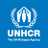

In [15]:
print("Profile image url is :", Prof_image_ur)
from IPython.display import Image
Profile_Image = Image(Prof_image_ur)
Profile_Image

# Twitter Account Followers

In [16]:
print('The number of followers this Twitter Account has are: ', follower)

The number of followers this Twitter Account has are:  2533301


# Twitter Account Following

In [17]:
print('The number of Twitter Accounts followed by this Twitter Account has are: ', followin)

The number of Twitter Accounts followed by this Twitter Account has are:  1810


# Total Tweets by this Twitter Account

In [18]:
print('The total number of tweets by this Twitter Account are:', totaltweet)

The total number of tweets by this Twitter Account are: 79240


In [19]:
twt = []
hshtg = []
retweet = []

for twee in alltweets:

    twt.append(twee.text)
    retweet.append(twee.retweet_count)
    hs = twee.entities['hashtags']
    if len(hs) != 0:
        
        hh_list = []
        for i in range(len(hs)):
            dct = hs[i]
            hh_list.append(str(dct.get('text')))
        hshtg.append(hh_list)
        
    else:
        hshtg.append([])
        

In [20]:
dicts = {'Tweets': twt, 'Hashtags': hshtg, 'Retweets':retweet}  

In [21]:
dfs = pd.DataFrame(dicts)

In [22]:
dfs.shape

(3249, 3)

# Tweets Dataset

In [23]:
dfs.head()

,Tweets,Hashtags,Retweets
0,“We are now surpassing another bleak milestone...,[],15
1,"UNHCR is working with partners in Melkadida, E...",[],8
2,Nothing beats the warmth of being wrapped in a...,[],12
3,"20,000 students in 75 countries joined the fir...",[],14
4,UNHCR is extremely concerned about the increas...,[],10


# Tweets Word Count Distribution

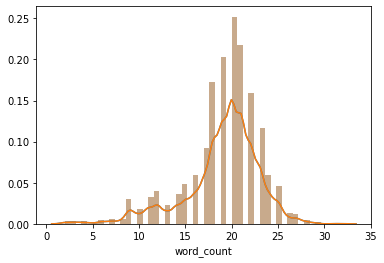

In [24]:
# Word Count Distribution Histogram

dfs["word_count"] = dfs["Tweets"].apply(lambda tweet: len(tweet.split()))
sns_plot = sns.distplot(dfs['word_count'])
fig = sns_plot.get_figure()
fig.savefig("unr_word_count.png")
sns.distplot(dfs['word_count'])

In [25]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [26]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [27]:
senti_analyzer = SentimentIntensityAnalyzer()

In [28]:
compound_score = []

for sen in dfs['Tweets']:
    
    compound_score.append(senti_analyzer.polarity_scores(sen)['compound'])

In [29]:
dfs['Compound Score'] = compound_score

In [30]:
Sentiment = []

for i in compound_score:
    
    if i >= 0.05:
        
        Sentiment.append('Positive')
        
    elif i > -0.05 and i < 0.05:
        
        Sentiment.append('Neutral')
        
    else:
        
        Sentiment.append('Negative')
        

In [31]:
dfs['Sentiment'] = Sentiment

In [32]:
pos_count = sum(dfs['Sentiment']=='Positive')
neg_count = sum(dfs['Sentiment']=='Negative')
neu_count = sum(dfs['Sentiment']=='Neutral')

# Sentiment Distribution of the Tweets

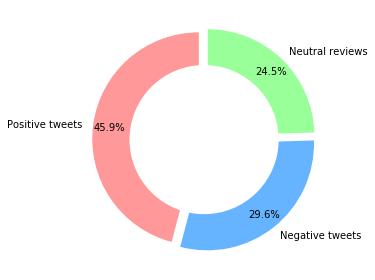

In [33]:
# Sentiment Distribution

pos_count = sum(dfs['Sentiment']=='Positive')
neg_count = sum(dfs['Sentiment']=='Negative')
neu_count = sum(dfs['Sentiment']=='Neutral')

import matplotlib.pyplot as plt
# Pie chart
labels = ['Positive tweets', 'Negative tweets', 'Neutral reviews']
sizes = [pos_count, neg_count, neu_count]
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = (0.05,0.05,0.05)
 
    
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.savefig('unr_sentiment_distribution.png')
plt.show()

# Most Positive Tweet

In [34]:
# Most Positive Tweet

pos_max = dfs.loc[dfs['Compound Score']==max(dfs['Compound Score'])]
pos_max

,Tweets,Hashtags,Retweets,word_count,Compound Score,Sentiment
1545,RT @RedHourBen: Congratulations to the inspiri...,[],31,22,0.9647,Positive


# Most Negative Tweet

In [36]:
# Most Negative Tweet

neg_max = dfs.loc[dfs['Compound Score']==min(dfs['Compound Score'])]
neg_max[:1]

,Tweets,Hashtags,Retweets,word_count,Compound Score,Sentiment
1356,"""The trauma of war. Of violence. Of discrimina...",[],22,20,-0.9643,Negative


# Positive Tweets

In [37]:
# Positive Tweets

gp = dfs.groupby(by=['Sentiment'])
positive_tweets = gp.get_group('Positive')
positive_tweets.head()

,Tweets,Hashtags,Retweets,word_count,Compound Score,Sentiment
3,"20,000 students in 75 countries joined the fir...",[],14,20,0.5267,Positive
7,RT @KellyTClements: This is cool - young peopl...,[],15,25,0.7184,Positive
8,RT @UNHCRPartners: 🏆We are thrilled to announc...,[ngoinnovationaward],12,22,0.9080,Positive
9,Even though recent headlines might suggest oth...,[],16,21,0.0772,Positive
10,"🇬🇷 Thanks to Kitsa Granny, this Syrian family ...",[],23,16,0.7003,Positive


In [38]:
positive_tweets.shape

(1491, 6)

# Negative Tweets

In [39]:
# Negative Tweets

negative_tweets = gp.get_group('Negative')
negative_tweets.head()

,Tweets,Hashtags,Retweets,word_count,Compound Score,Sentiment
0,“We are now surpassing another bleak milestone...,[],15,21,-0.2960,Negative
2,Nothing beats the warmth of being wrapped in a...,[],12,19,-0.3570,Negative
4,UNHCR is extremely concerned about the increas...,[],10,19,-0.4215,Negative
6,"""I think GBV is injustice towards women. It is...",[],10,23,-0.5267,Negative
14,"""It's been a lifetime of sorrow.""\n\nWe are de...",[],40,22,-0.7960,Negative


In [40]:
negative_tweets.shape

(962, 6)

# Neutral Tweets

In [41]:
# Neutral Tweets

neutral_tweets = gp.get_group('Neutral')
neutral_tweets.head()

,Tweets,Hashtags,Retweets,word_count,Compound Score,Sentiment
1,"UNHCR is working with partners in Melkadida, E...",[],8,18,0.0,Neutral
5,RT @SesameWorkshop: Meet Jad &amp; Nowar! Jad ...,[AhlanSimsim],22,23,0.0,Neutral
16,Here are 5️⃣ things you need to know about Afg...,[],22,12,0.0,Neutral
26,How are refugees coping with coronavirus in so...,[],26,16,0.0,Neutral
27,"This winter, @neilhimself asked you to #DrawFo...",[DrawForRefugees],24,19,0.0,Neutral


In [42]:
neutral_tweets.shape

(796, 6)

# Wordcloud Function

In [43]:
# Wordcloud Function

def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='w')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

In [44]:
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['suppo','every']
stopwords.extend(newStopWords)

In [45]:
def wordcloud(data):
    
    words_corpus = ''
    words_list = []

    
    for rev in data["Tweets"]:
        
        text = str(rev).lower()
        text = text.replace('rt', ' ') 
        text = re.sub(r"http\S+", "", text)        
        text = re.sub(r'[^\w\s]','',text)
        text = ''.join([i for i in text if not i.isdigit()])
        
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords]
        
        # Remove aplha numeric characters
        
        for words in tokens:
            
            words_corpus = words_corpus + words + " "
            words_list.append(words)
            
    return words_corpus, words_list

# WordCloud - Positive Tweets

In [46]:
import cv2
image1 = cv2.imread('mask1.png')
mask = np.array(image1)

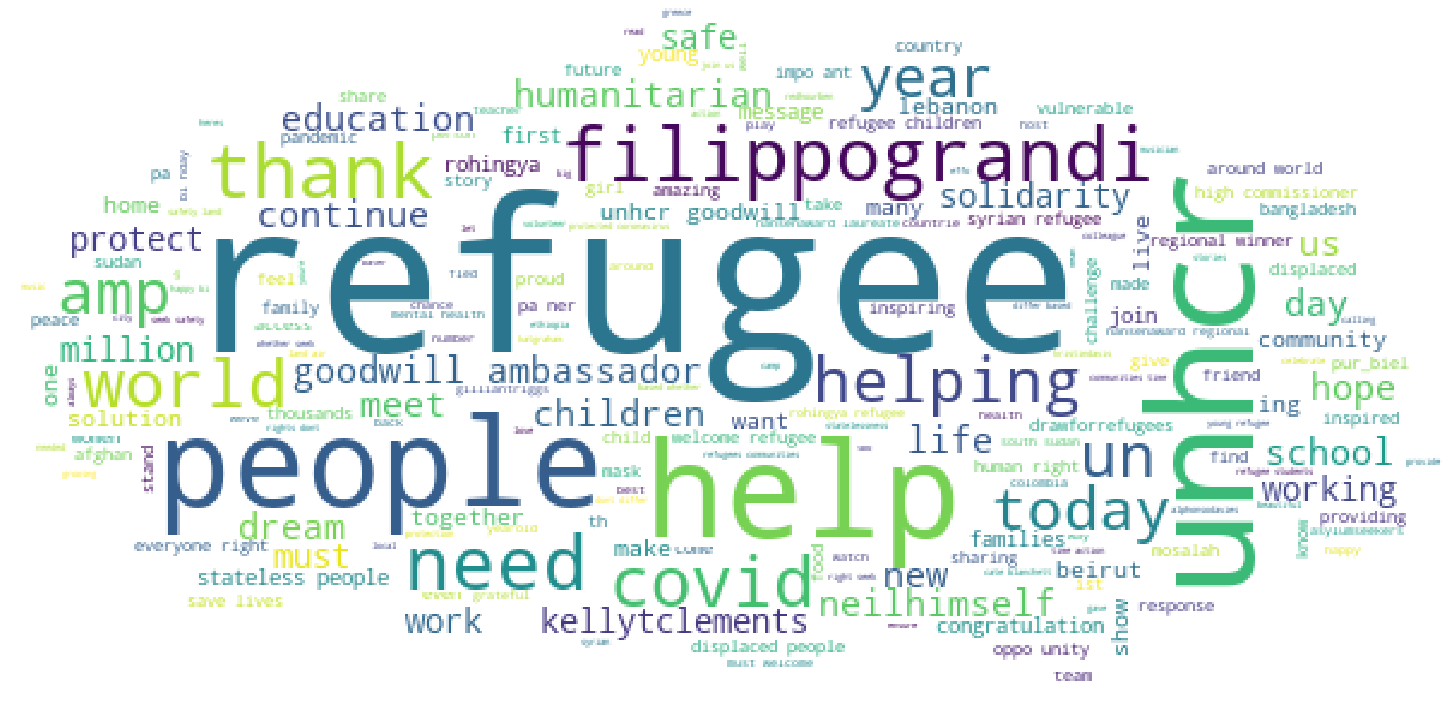

In [50]:
# WordCloud - Positive Tweets

from wordcloud import WordCloud
positive_wordcloud = WordCloud(background_color= "white",mask=mask,width=900, height=900).generate(wordcloud(positive_tweets)[0])
    
plot_Cloud(positive_wordcloud)
positive_wordcloud.to_file('unr_positive_tweets_wc.png')


# WordCloud - Negative Tweets

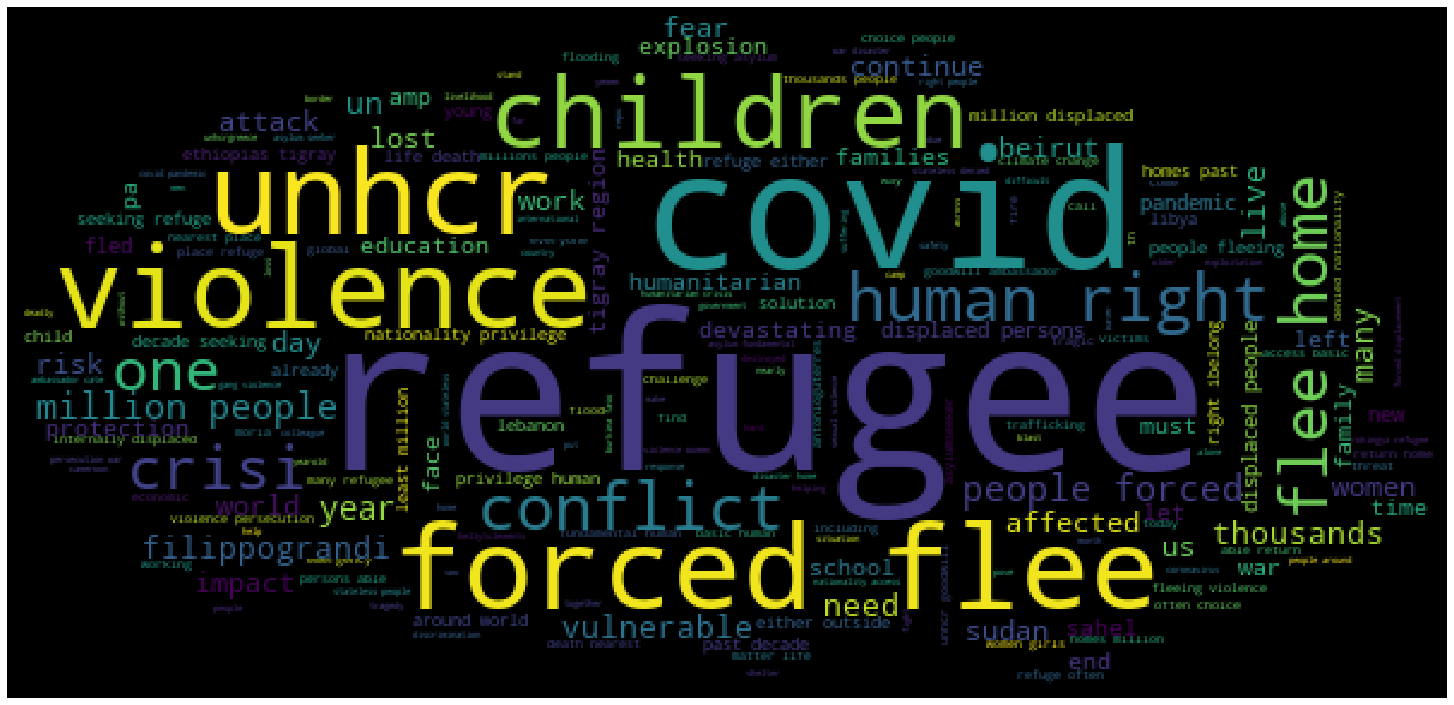

In [49]:
# WordCloud - Negative Tweets

negative_wordcloud = WordCloud(width=900,mask=mask, height=900).generate(wordcloud(negative_tweets)[0])

plot_Cloud(negative_wordcloud)
negative_wordcloud.to_file('unr_negative_tweets_wc.png')


# WordCloud - Neutral Tweets

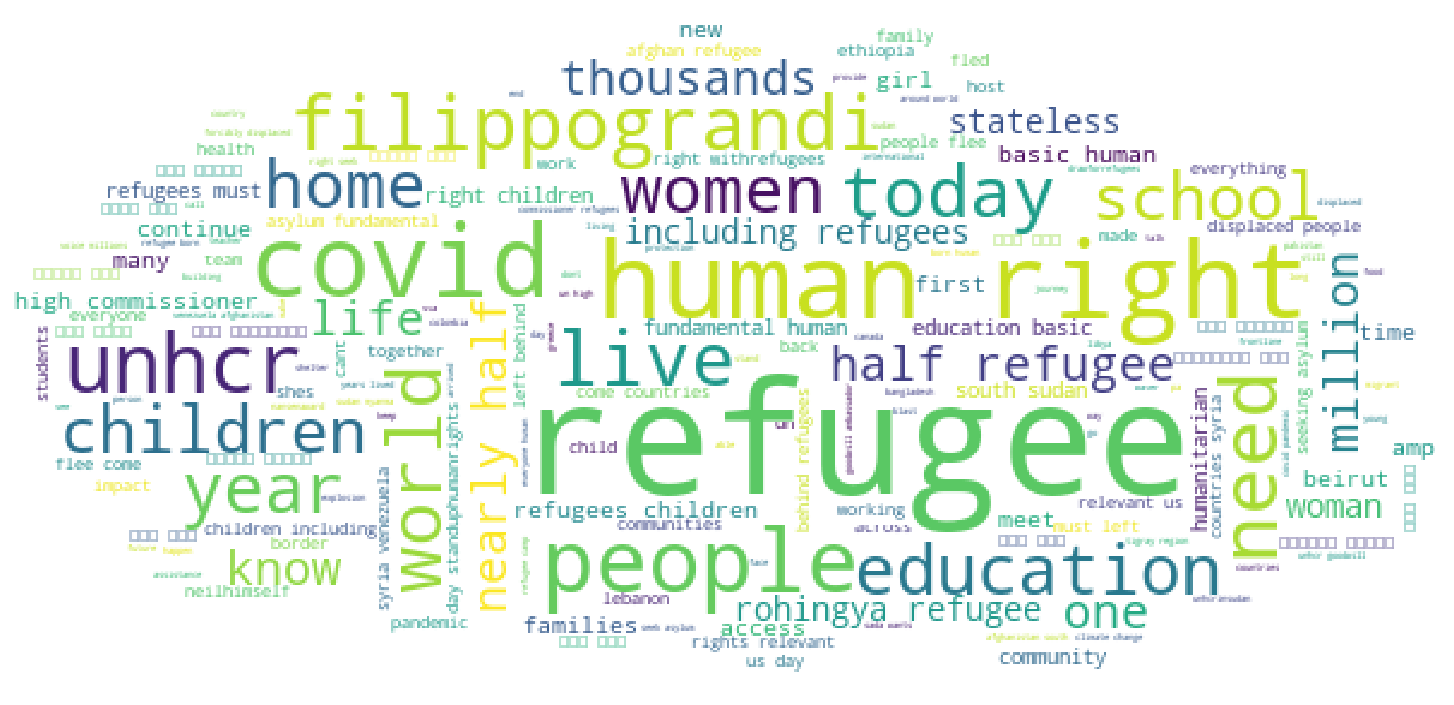

In [51]:
# WordCloud - Neutral Tweets

neutral_wordcloud = WordCloud(background_color= "white",mask=mask,width=900, height=900).generate(wordcloud(neutral_tweets)[0])

plot_Cloud(neutral_wordcloud)
neutral_wordcloud.to_file('unr_neutral_tweets_wc.png')


# Wordcloud - All Tweets

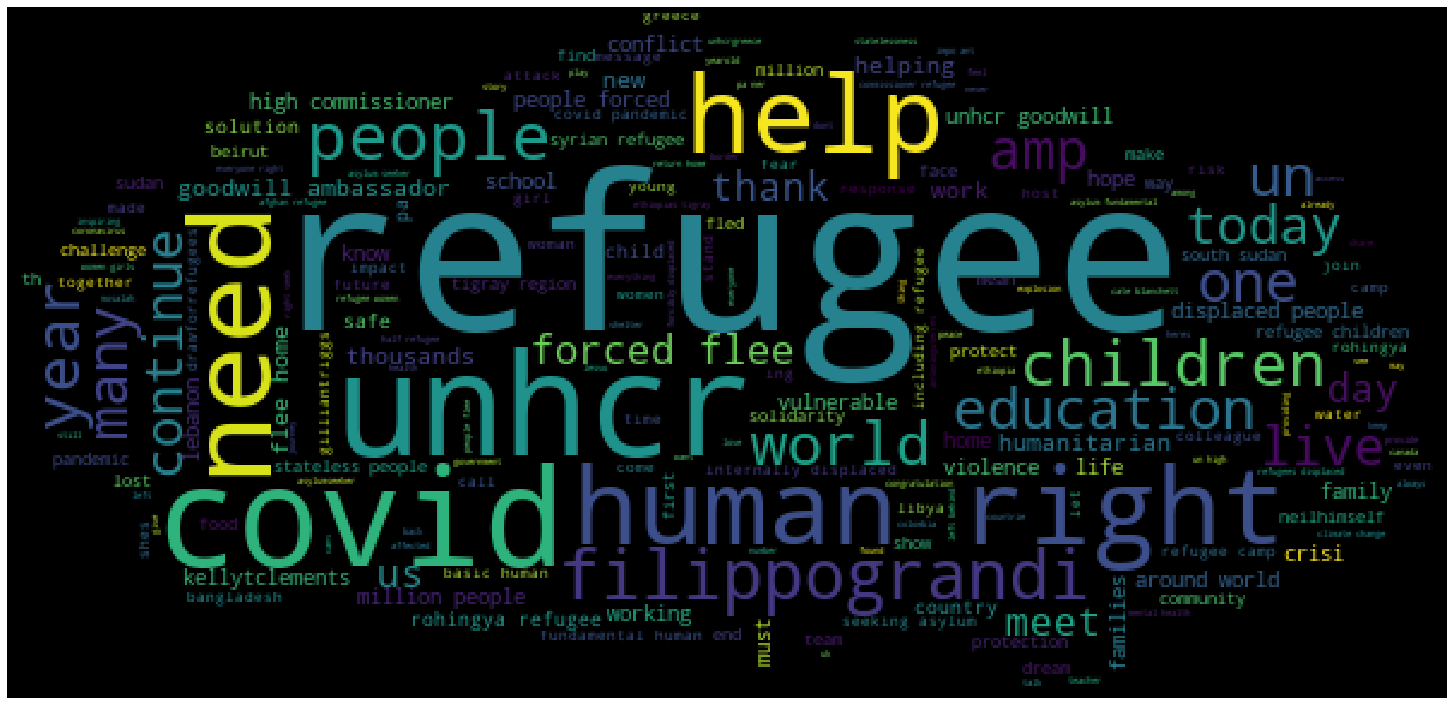

In [61]:
# Wordcloud - All Tweets

total_wordcloud = WordCloud(width=1600,mask=mask, height=800).generate(wordcloud(dfs)[0])

plot_Cloud(total_wordcloud)

total_wordcloud.to_file('unr_total_tweets_wc.png')


# Most Frequent words used in all the Tweets

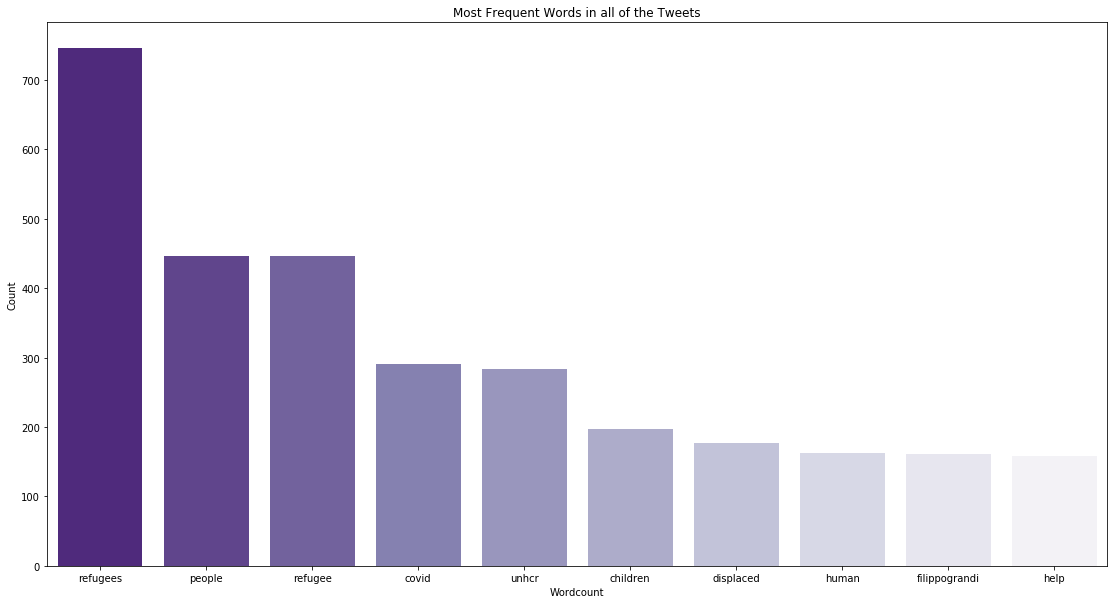

In [53]:
# Most Frequent Words - Total Tweets

aa = nltk.FreqDist(wordcloud(dfs)[1])
dd = pd.DataFrame({'Wordcount': list(aa.keys()),
                  'Count': list(aa.values())})
# selecting top 10 most frequent hashtags     
dd = dd.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(19,10))
plt.title('Most Frequent Words in all of the Tweets')
ax = sns.barplot(data=dd,palette="Purples_r", x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
fig = ax.get_figure()
fig.savefig("unr_total_tweets_wf.png")
plt.show()

# Most Frequent words used in the Positive Tweets

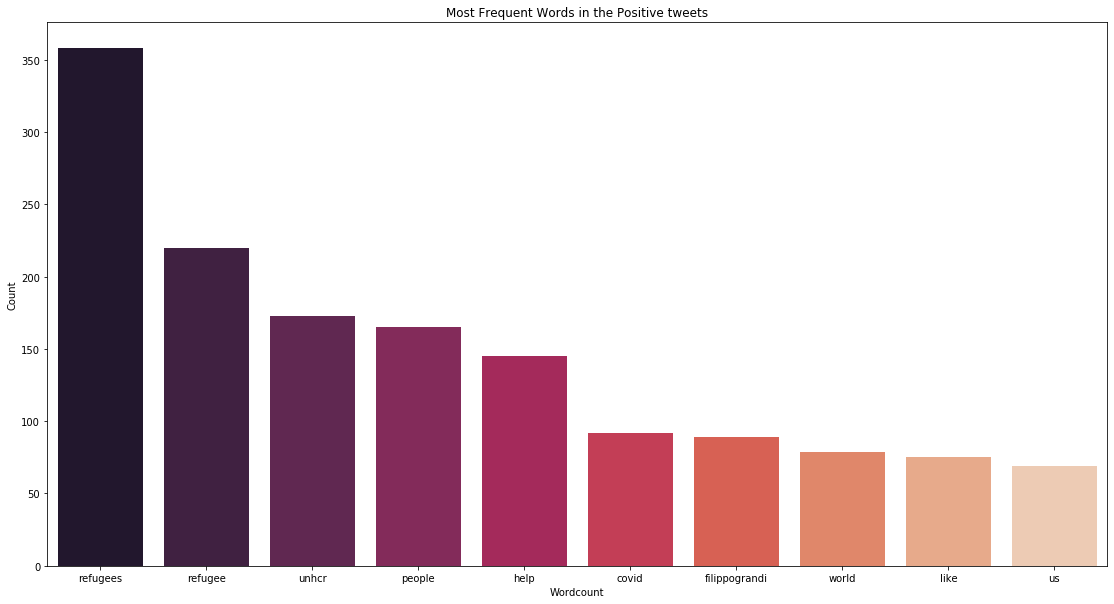

In [54]:
# Most Frequent Words - Positive Tweets

ap = nltk.FreqDist(wordcloud(positive_tweets)[1])
dp = pd.DataFrame({'Wordcount': list(ap.keys()),
                  'Count': list(ap.values())})
# selecting top 10 most frequent hashtags     
dp = dp.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(19,10))
plt.title('Most Frequent Words in the Positive tweets')
ax = sns.barplot(data=dp, palette="rocket", x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
fig = ax.get_figure()
fig.savefig("unr_positive_tweets_wf.png")
plt.show()

# Most Frequent words used in the Negative Tweets

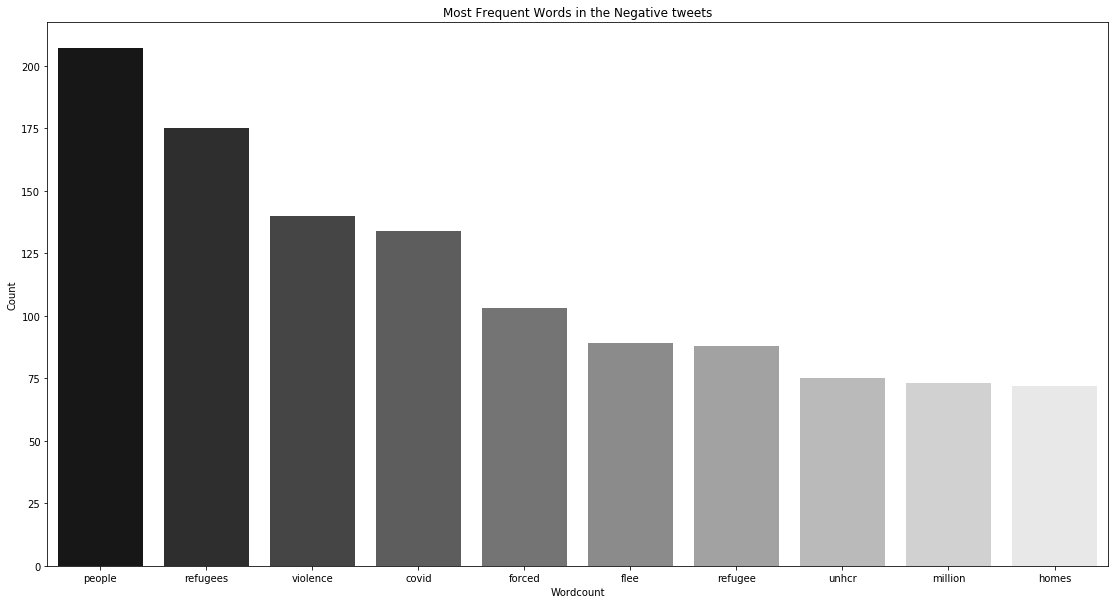

In [55]:
# Most Frequent Words - Negative Tweets

an = nltk.FreqDist(wordcloud(negative_tweets)[1])
dn = pd.DataFrame({'Wordcount': list(an.keys()),
                  'Count': list(an.values())})
# selecting top 10 most frequent hashtags     
dn = dn.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(19,10))
plt.title('Most Frequent Words in the Negative tweets')
ax = sns.barplot(data=dn, palette="gray", x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
fig = ax.get_figure()
fig.savefig("unr_negative_tweets_wf.png")
plt.show()

# Most Frequent words used in the Neutral Tweets

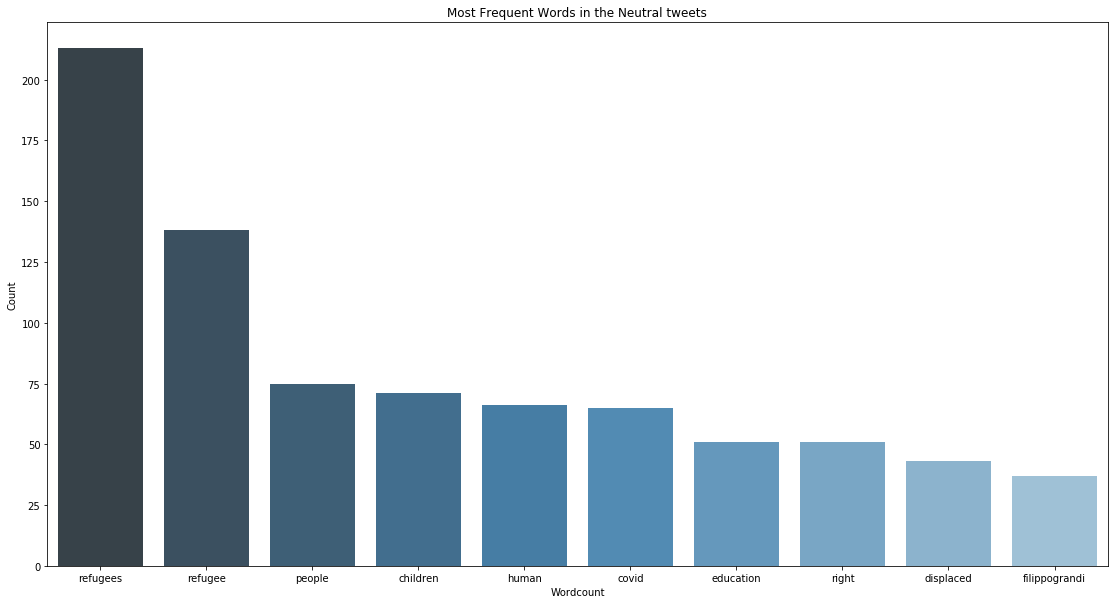

In [56]:
# Most Frequent Words - Neutral Tweets

au = nltk.FreqDist(wordcloud(neutral_tweets)[1])
du = pd.DataFrame({'Wordcount': list(au.keys()),
                  'Count': list(au.values())})
# selecting top 10 most frequent hashtags     
du = du.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(19,10))
plt.title('Most Frequent Words in the Neutral tweets')
ax = sns.barplot(data=du, palette= "Blues_d", x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
fig = ax.get_figure()
fig.savefig("unr_neutral_tweets_wf.png")
plt.show()